In [25]:
# import libraries
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
np.set_printoptions(precision=5, suppress=True)  # setting print options for numbers

import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# load *or* generate data using appropriate cells

(557, 180)


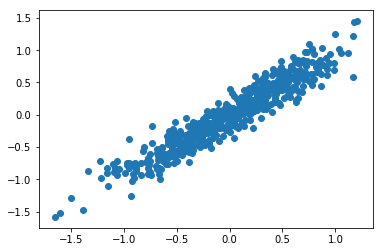

In [38]:
# load data (fMRI data)
df1  = pd.read_csv("100307.csv")
X  = df1.values
Nvars = X.shape[1]

# plot data
print X.shape
plt.scatter(X[:,0], X[:,3]) # notice: there are 180 features in the dataset!
plt.show()

(150, 2)


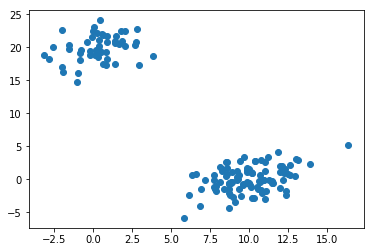

In [26]:
# generate data (two clusters: a with 100 points, b with 50)
np.random.seed(4711)  # for repeatability of the analysis
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)

# plot data
print X.shape  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

In [27]:
# generate the linkage matrix
Z = linkage(X, method='ward') # setting a method (e.g. 'ward')

## notice: other linkage methods for calculating the distance between newly formed clusters can be used
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

In [28]:
# check the cophenetic correlation coefficient
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c # cophenetic correlation coefficient 

## notice: cophenetic correlation coefficient
# compares the actual pairwise distances of all your samples to those implied by the hierarchical clustering
# the closer the value is to 1, the better the clustering preserves the original distances

0.98001483875742679

In [29]:
Z[:25] # shows 25 first cluster merges (resulting array has the format [idx1, idx2, dist, sample_count])

array([[  52.     ,   53.     ,    0.04151,    2.     ],
       [  14.     ,   79.     ,    0.05914,    2.     ],
       [  33.     ,   68.     ,    0.07107,    2.     ],
       [  17.     ,   73.     ,    0.07137,    2.     ],
       [   1.     ,    8.     ,    0.07543,    2.     ],
       [  85.     ,   95.     ,    0.10928,    2.     ],
       [ 108.     ,  131.     ,    0.11007,    2.     ],
       [   9.     ,   66.     ,    0.11302,    2.     ],
       [  15.     ,   69.     ,    0.11429,    2.     ],
       [  63.     ,   98.     ,    0.1212 ,    2.     ],
       [ 107.     ,  115.     ,    0.12167,    2.     ],
       [  65.     ,   74.     ,    0.1249 ,    2.     ],
       [  58.     ,   61.     ,    0.14028,    2.     ],
       [  62.     ,  152.     ,    0.1726 ,    3.     ],
       [  41.     ,  158.     ,    0.1779 ,    3.     ],
       [  10.     ,   83.     ,    0.18635,    2.     ],
       [ 114.     ,  139.     ,    0.20419,    2.     ],
       [  39.     ,   88.     ,

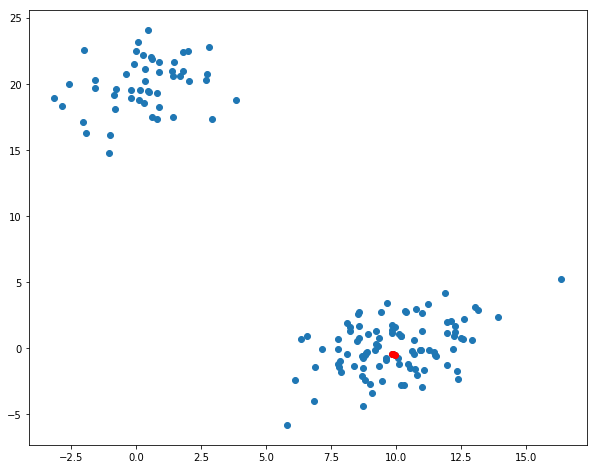

In [30]:
# set the idxs according to the data you use (loaded or generated)
idxs = [33, 68, 62] # for generated data
#idxs = [257, 255, 256] # for loaded fMRI data (to-be-checked!)

# plot a selected cluster
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])  # plot all points
plt.scatter(X[idxs,0], X[idxs,1], c='r')  # plot interesting points in red again
plt.show()

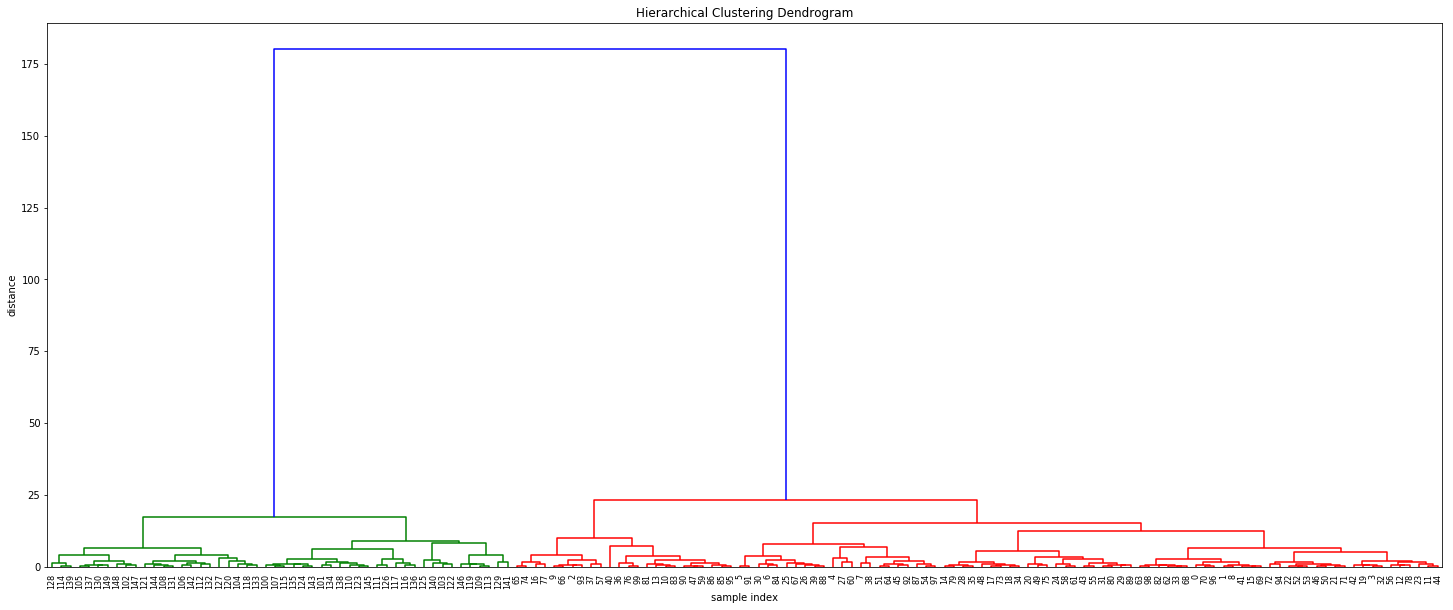

In [31]:
# plot full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

## notice: how to read a dendrogram plot
# a dendrogram is a visualization in form of a tree 
# showing the order and distances of merges during the hierarchical clustering

# on the x axis you see labels (if you don't specify anything else they are the indices of your samples)
# on the y axis you see the distances (e.g. of the specified linkage method)
# horizontal lines are cluster merges
# vertical lines tell you which clusters/labels were part of merge forming that new cluster
# heights of the horizontal lines tell you about the distance that needed to be "bridged" to form the new cluster

## notice: color notation
# if not specified, the color_threshold argument of dendrogram() will automagically pick a distance cut-off value
# of 70% of the final merge and then color the first clusters below that in individual colors
# (https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

In [32]:
Z[-10:] # shows 10 last merges (resulting array has the format [idx1, idx2, dist, sample_count])

## notice: huge distance jumps in the dendrogram indicate that something is merged, but perhaps shouldn't be merged

array([[  40.     ,  278.     ,    7.11106,   14.     ],
       [ 277.     ,  288.     ,    7.86879,   22.     ],
       [ 266.     ,  280.     ,    8.04935,   10.     ],
       [ 285.     ,  291.     ,    8.74822,   27.     ],
       [ 282.     ,  289.     ,    9.84428,   24.     ],
       [ 284.     ,  286.     ,   12.42735,   54.     ],
       [ 290.     ,  294.     ,   15.11533,   76.     ],
       [ 287.     ,  292.     ,   17.11527,   50.     ],
       [ 293.     ,  295.     ,   23.12199,  100.     ],
       [ 296.     ,  297.     ,  180.27043,  150.     ]])

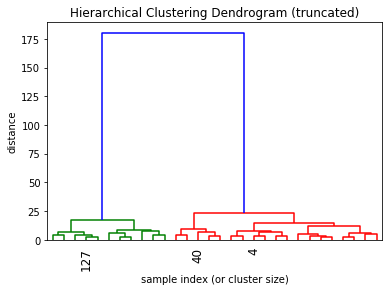

In [33]:
# plot truncated dendrogram
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index (or cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=30,  # show only the last p merged clusters
    show_leaf_counts=False,  # to get cluster sizes (numbers in brackets are counts)
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=False,  # to get a distribution impression in truncated branches
)
plt.show()

## notice: most labels are missing (all other samples were already merged into clusters before the last p merges)

In [25]:
# adding cluster distances and a cut-off line
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

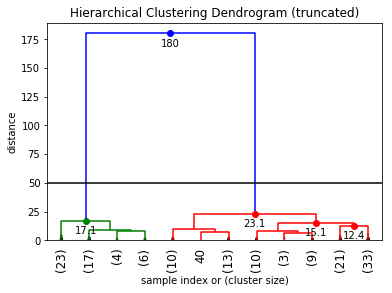

In [27]:
# plot fancy dendrogram
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=50,  # set max distance and plot a horizontal cut-off line
)
plt.show()

In [39]:
# retrieving clusters
from scipy.cluster.hierarchy import fcluster

## notice: with help of a dendrogram we can determine either: 

# max distance criterion
max_d = 50
clusters = fcluster(Z, max_d, criterion='distance')

## max number of clusters criterion
#k=2
#fcluster(Z, k, criterion='maxclust')

clusters # cluster id for each of the samples

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

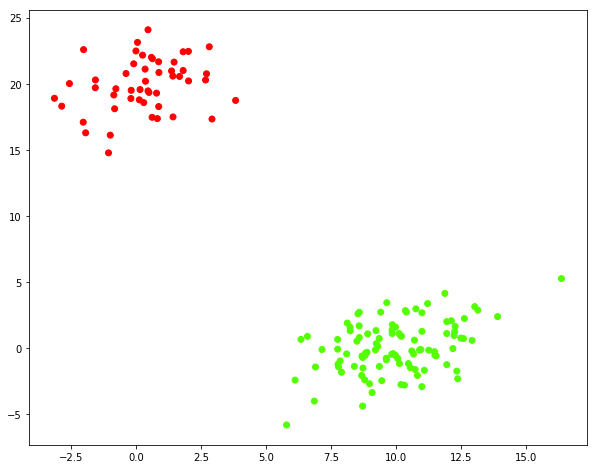

In [37]:
# plot the retrieved clusters
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()